**Data Source**: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/code

**Context**
Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.

Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.

**Content**

In this Dataset, we have information on almost 4700+ Houses/Apartments/Flats Available for Rent with different parameters like BHK, Rent, Size, No. of Floors, Area Type, Area Locality, City, Furnishing Status, Type of Tenant Preferred, No. of Bathrooms, Point of Contact.

**Dataset Glossary (Column-Wise)**

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of 
Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder  # For scaling dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm


import matplotlib.pyplot as plt
%matplotlib inline
from  matplotlib import style
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [2]:
df=pd.read_csv("/content/House_Rent_Dataset.csv")

In [3]:
df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

**Data Visualization**

**Target Variable**

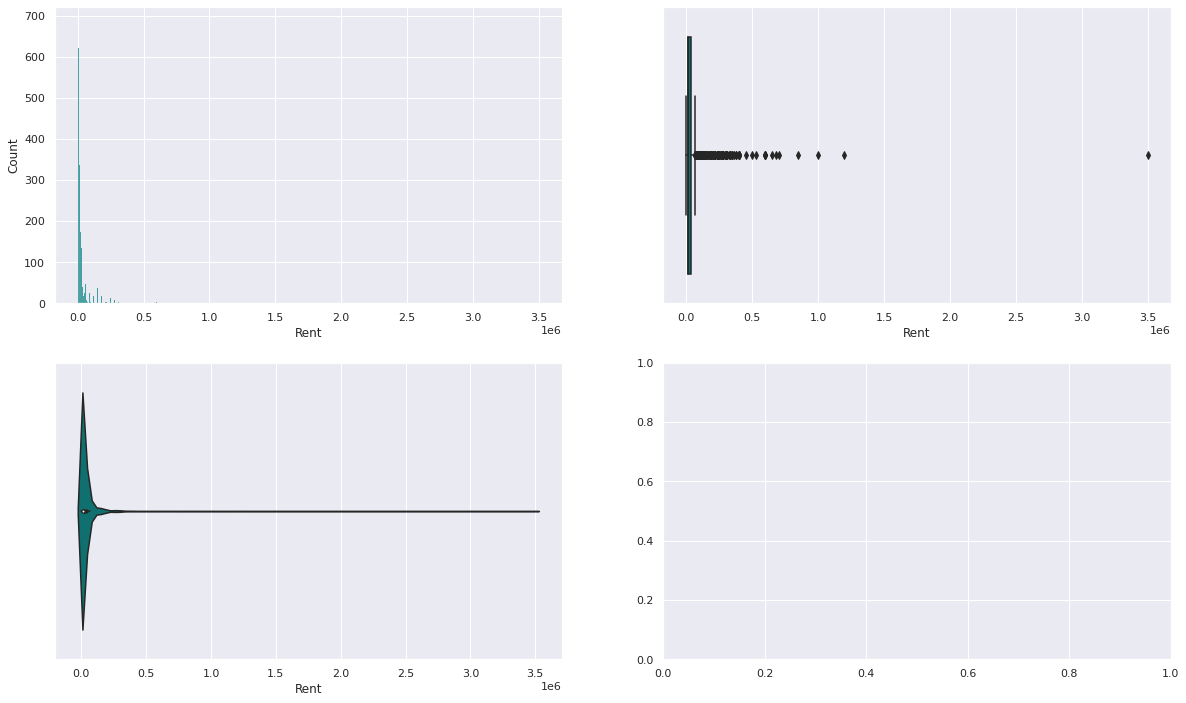

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = df['Rent'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = df['Rent'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = df['Rent'], ax= ax[1, 0], color= 'teal')

plt.show()

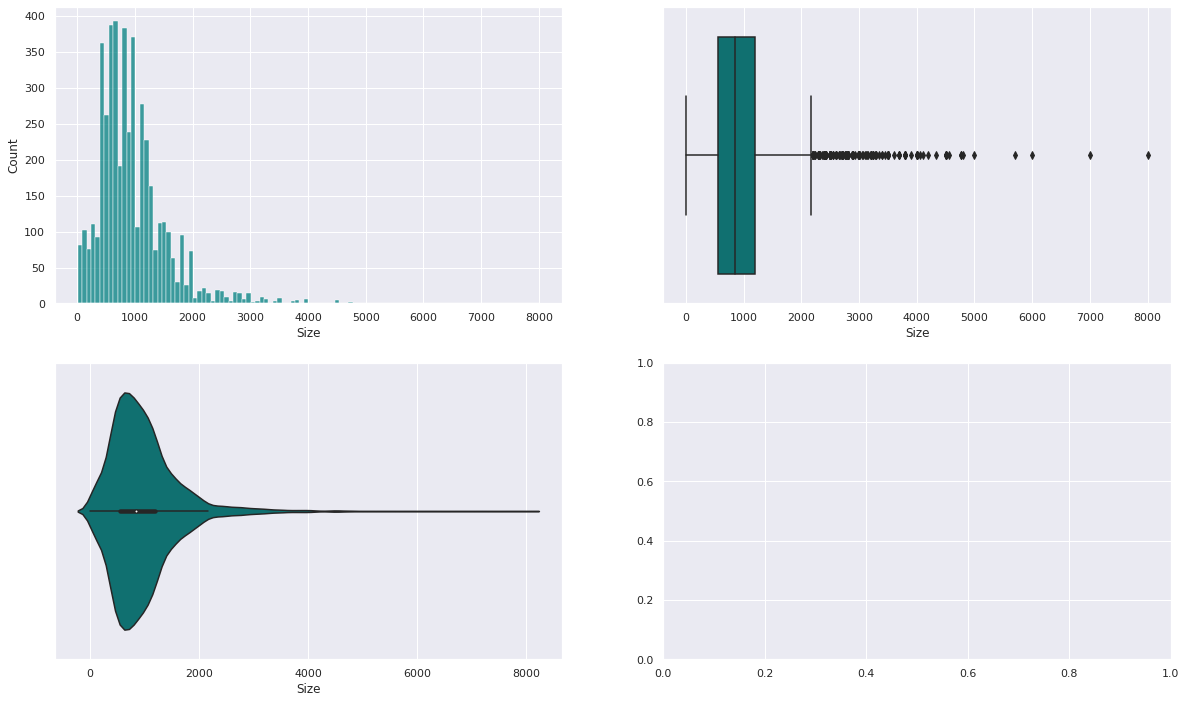

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
ax1 = sns.histplot(x = df['Size'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = df['Size'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = df['Size'], ax= ax[1, 0], color= 'teal')

plt.show()

**Plotting categorical variables vs Rent**

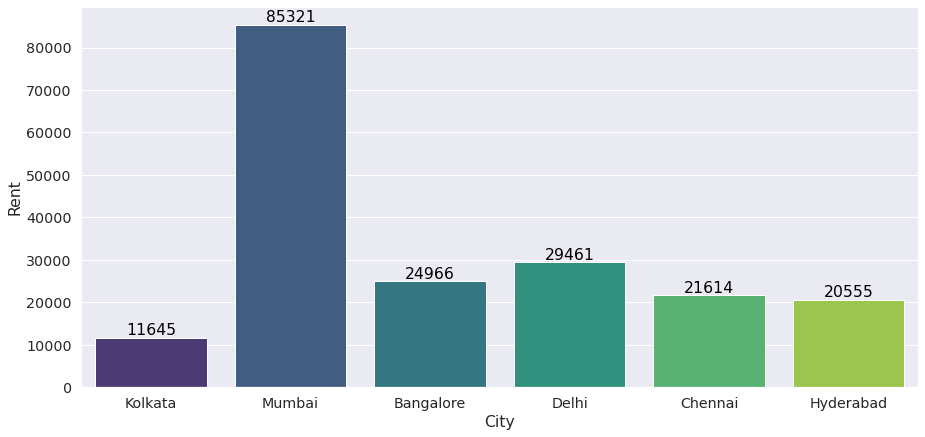

In [36]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['City'], 
                 y=df['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

**Observation : In Mumbai city rent is maximumn , next is Bangalore**

**Plotting graphs for BHK and Rent**

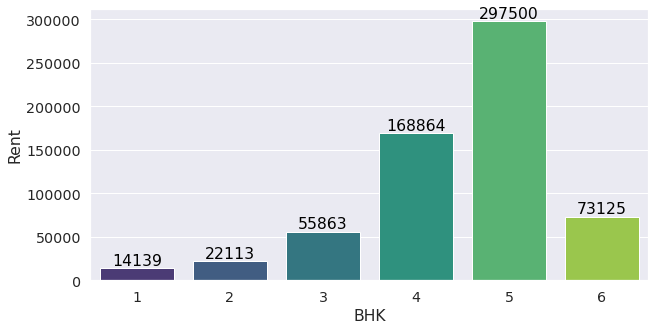

In [52]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df['BHK'].sort_values(ascending=True), 
                 y=df['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.4, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

**Plotting graphs for Tenant Preferred and Rent**

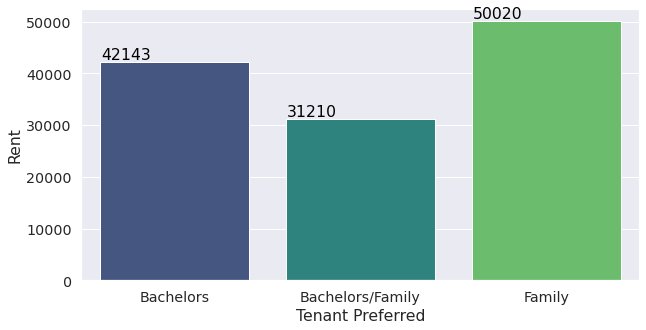

In [51]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df['Tenant Preferred'].sort_values(ascending=True), 
                 y=df['Rent'],
                palette='viridis',
                 ci = None)
plt.ylabel('Rent');


for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

**Plotting graphs for cites-frunished and Rent**

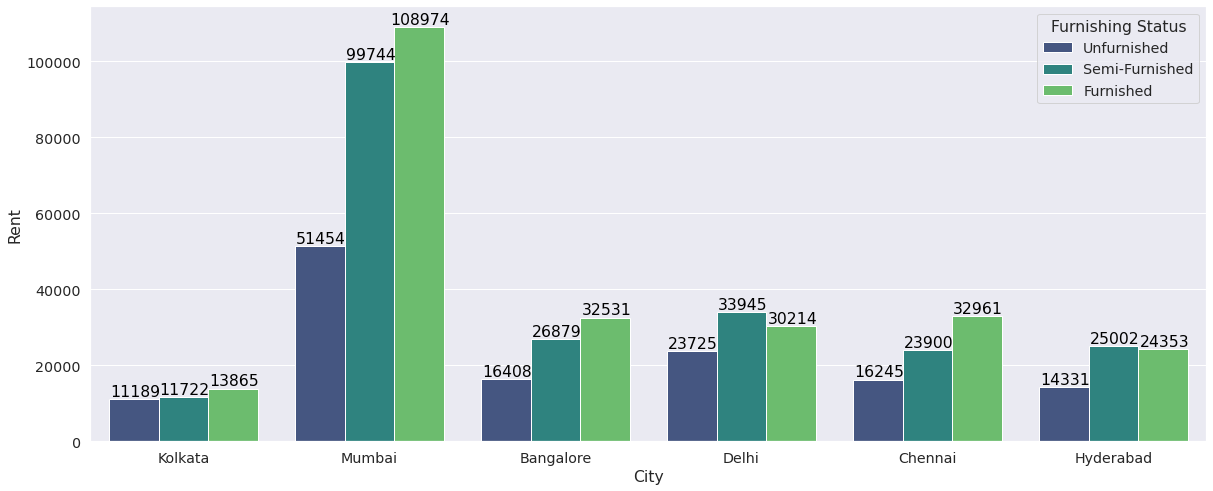

In [56]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=df['City'], 
                 y=df['Rent'],
                 hue = df['Furnishing Status'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

**Model Build**

In [57]:
df1=df.copy()

In [58]:
df1=df1.drop('Posted On',axis=1)

In [59]:
df1.head(2)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [60]:
# Encoding of categorical class variable to integers which will be used for feeding the model
def labelencode(x):
    le = LabelEncoder()
    le_encoded = le.fit_transform(x)
    #le_encoded = le.transform(le)
    print((le.classes_))
    print(le_encoded)
    return le_encoded

In [61]:
df1.select_dtypes(include ='object')

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...
4741,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent


In [62]:
Catergorical_Col=['Floor','Area Locality','Area Type','City','Furnishing Status','Tenant Preferred','Point of Contact']
for x in Catergorical_Col:
    
    df1[x] = labelencode(df1[x])

['1' '1 out of 1' '1 out of 10' '1 out of 11' '1 out of 12' '1 out of 13'
 '1 out of 14' '1 out of 15' '1 out of 16' '1 out of 19' '1 out of 2'
 '1 out of 20' '1 out of 22' '1 out of 24' '1 out of 3' '1 out of 35'
 '1 out of 4' '1 out of 5' '1 out of 6' '1 out of 7' '1 out of 8'
 '1 out of 9' '10 out of 10' '10 out of 11' '10 out of 12' '10 out of 13'
 '10 out of 14' '10 out of 15' '10 out of 16' '10 out of 18'
 '10 out of 19' '10 out of 20' '10 out of 22' '10 out of 23'
 '10 out of 24' '10 out of 25' '10 out of 28' '10 out of 31'
 '10 out of 32' '10 out of 37' '11 out of 11' '11 out of 12'
 '11 out of 13' '11 out of 14' '11 out of 15' '11 out of 16'
 '11 out of 17' '11 out of 18' '11 out of 19' '11 out of 20'
 '11 out of 21' '11 out of 22' '11 out of 23' '11 out of 24'
 '11 out of 25' '11 out of 26' '11 out of 27' '11 out of 28'
 '11 out of 31' '11 out of 35' '11 out of 51' '12 out of 13'
 '12 out of 14' '12 out of 16' '12 out of 17' '12 out of 18'
 '12 out of 19' '12 out of 20' '12 o

In [63]:
df1.head(5)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,455,2,221,4,2,1,2,2
1,2,20000,800,14,2,1527,4,1,1,1,2
2,2,17000,1000,14,2,1760,4,1,1,1,2
3,2,10000,800,10,2,526,4,2,1,1,2
4,2,7500,850,10,1,1890,4,2,0,1,2


In [64]:
df1.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

In [113]:
X=df1.drop(['Rent','Size','Bathroom'],axis=1)
Y=df1['Rent']
print("dependent and independent variables are selected...")

dependent and independent variables are selected...


In [114]:
df1[['BHK','Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred',
       'Point of Contact','Area Locality']].corr()

,BHK,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact,Area Locality
BHK,1.000000,-0.005432,-0.153225,0.046914,-0.140264,0.041534,-0.230954,0.016211
Floor,-0.005432,1.000000,-0.020014,0.098340,-0.014131,0.016247,-0.025098,-0.021142
Area Type,-0.153225,-0.020014,1.000000,-0.282856,0.056276,0.155388,0.559451,-0.007743
City,0.046914,0.098340,-0.282856,1.000000,0.002633,0.041769,-0.357165,-0.042836
Furnishing Status,-0.140264,-0.014131,0.056276,0.002633,1.000000,-0.092878,0.131276,0.015144
Tenant Preferred,0.041534,0.016247,0.155388,0.041769,-0.092878,1.000000,0.063182,-0.030848
Point of Contact,-0.230954,-0.025098,0.559451,-0.357165,0.131276,0.063182,1.000000,0.000294
Area Locality,0.016211,-0.021142,-0.007743,-0.042836,0.015144,-0.030848,0.000294,1.000000


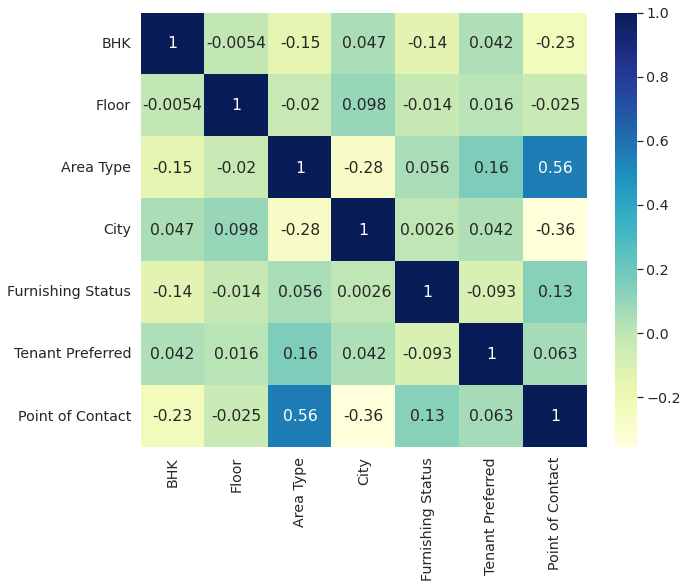

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(df1[['BHK','Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred',
       'Point of Contact']].corr(),annot=True,cmap="YlGnBu")

Observation : No corelation found

Note : Verifying Multicollinearity Checking that input features are NOT correlated to one other

If there is correlation, the prediction we'll get from Logistic Regression will be incorrect or highly biased

Correlation values

values range between "-1 to 1"

Closer to -1, input features are oppositely correlated

Around 0 : Continuous Variable doesn't impact other Continuous Variable

0 to 1 : Closer to 1, input features are highly +vely correlated

Diagnol of Correlation matrix is always 1 as Correlation of variable with itself is always equal to 1

In [119]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split( X,Y,test_size=0.20,random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(3796, 8)
Shape of Test Xs:(950, 8)
Shape of Training y:(3796,)
Shape of Test y:(950,)


In [120]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print("Accuracy on Traing set: ",lr.score(x_train,y_train))
print("Accuracy on Testing set: ",lr.score(x_test,y_test))

Accuracy on Traing set:  0.05558482613277134
Accuracy on Testing set:  0.04842105263157895


In [121]:
df1_prediction = pd.DataFrame({"Actual Selling Price":y_test,"Predicted_Price":y_pred})

In [122]:
df1_prediction.head(5)

,Actual Selling Price,Predicted_Price
3481,7000,15000
3874,10677,15000
1815,23000,15000
2667,36000,10000
920,75000,15000


In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
mse = cross_val_score(lr,X,Y,scoring='neg_mean_squared_error',cv=10)
mse

array([-2.61548940e+09, -3.58905162e+09, -3.09633949e+09, -2.76562151e+09,
       -2.81017656e+10, -3.57439497e+09, -3.23496093e+09, -4.41023287e+09,
       -4.94338827e+09, -9.33701184e+09])

In [125]:
mean_mse = np.mean(mse)
mean_mse

-6566825649.883873

**Model Evaluation**

In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [127]:
y_pred= lr.predict(x_test)
print("Mean Absolute Error of Linear Regressor is: ",round(mean_absolute_error(y_test,y_pred),2))
print("\nMean Squared Error of Linear Regressor is: ",round(mean_squared_error(y_test,y_pred),2))
print("\nR2 Score of Linear Regressor is: ",r2_score(y_test,y_pred))

Mean Absolute Error of Linear Regressor is:  24139.67

Mean Squared Error of Linear Regressor is:  3796628184.51

R2 Score of Linear Regressor is:  -0.12029823332055822


**With Other Model**

In [128]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))

In [129]:
for name, model in models:
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print (name, ': ', str(score))

LR :  0.04842105263157895
Lasso :  0.4129186332519327
Ridge :  0.41292278137635474
DTC :  0.061052631578947365
NB :  0.008421052631578947
RFC :  0.07473684210526316


In [149]:
model = LogisticRegression()
model = model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred_model= lr.predict(x_test)
print("Accuracy on Traing set: ",model.score(x_train,y_train))
print("Accuracy on Testing set: ",model.score(x_test,y_test))

Accuracy on Traing set:  0.05558482613277134
Accuracy on Testing set:  0.04842105263157895


In [152]:
df1_prediction2 = pd.DataFrame({"Actual Rent Price":y_test,"Predicted_Rent rf":y_pred_model,"Predicted_Price lr":y_pred})

In [160]:
df1_prediction2.iloc[150:200]

,Actual Rent Price,Predicted_Rent rf,Predicted_Price lr
4695,7000,12000,12000
3164,17000,15000,15000
3981,24000,15000,15000
1156,45000,10000,10000
1478,38000,15000,15000
1974,30000,10000,10000
4161,120000,12000,12000
715,32000,15000,15000
2278,8200,10000,10000
2411,10000,15000,15000


In [151]:
df1.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

In [135]:
X.head(2)

,BHK,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,2,455,2,221,4,2,1,2
1,2,14,2,1527,4,1,1,2


In [162]:
data_new={'BHK':2,'Floor':2, 'Area Type':1,'Area Locality':221, 'City':5,
       'Furnishing Status':2, 'Tenant Preferred':1,
       'Point of Contact':2}          
index=[1]#serial number
my_data=pd.DataFrame(data_new,index)

In [163]:
print(my_data)

   BHK  Floor  Area Type  Area Locality  City  Furnishing Status  \
1    2      2          1            221     5                  2   

   Tenant Preferred  Point of Contact  
1                 1                 2  


In [164]:
#Pricing allocated
# Here the linearmodel is the variable  used in 13
my_data_rent=lr.predict(my_data)
rounded_rent = np.round(my_data_rent, 2)
print(f" The predicted rent for the given data is :{rounded_rent}")

 The predicted rent for the given data is :[15000]
